In [83]:
library(ISLR2)
set.seed(1)
library(boot)

## The Bootstrap

We illustrate the use of the bootstrap in the simple example of Section 5.2, as well as on an example involving estimating the
accuracy of the linear regression model on the `Auto` data set.

\subsubsection{Estimating the Accuracy of a Statistic of Interest}


One of the great advantages of the bootstrap approach is that it can be
applied in almost all situations. No complicated mathematical calculations
are required. Performing a bootstrap analysis in `R` entails only two
steps. First, we must create a function that computes the statistic of
interest. Second, we use the `boot()` function, which is part of the `boot` library, to perform the bootstrap by repeatedly
sampling observations from the data set with replacement.

The `Portfolio` data set in the `ISLR2` package is simulated data of $100$ pairs of returns, generated in the fashion described in Section 5.2.
To illustrate the use of the bootstrap on this data, we must first
create a function, `alpha.fn()`, which takes as input the $(X,Y)$ data
as well as a vector indicating which observations should be used to
estimate $\alpha$. The function then outputs the estimate for $\alpha$
based on the selected observations.

In [41]:
alpha.fn <- function(data, index) {
  X <- data$X[index]
  Y <- data$Y[index]
  (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

This function *returns*, or outputs, an  estimate for $\alpha$ based on applying ( 5.7) to the observations indexed by the argument `index`.
For instance, the following command tells `R` to estimate $\alpha$ using
all $100$ observations.

In [39]:
# write.csv(Portfolio,"C:/Users/MSI-NB/Documents/GitHub/ECO224/Labs/data/Portfolio.csv", row.names = FALSE)

In [42]:
Portfolio

X,Y
<dbl>,<dbl>
-0.89525089,-0.23492353
-1.56245433,-0.88517599
-0.41708988,0.27188802
1.04435573,-0.73419750
-0.31556841,0.84198343
-1.73712385,-2.03719104
1.96641316,1.45295666
2.15286790,-0.43413863
-0.08120803,1.45080850


In [43]:
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

The next command  uses the `sample()` function to randomly select
$100$ observations from the range $1$ to $100$, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$
based on the new data set.

In [46]:
sample(100, 100, replace = T)

[1]  88  53  86  50  80  30  93   2  72  78  36  90  40  37  72  56  71 100
 [19] 100  73  27  41  15  57  38  62   6   4  35  99  77  57  71  25  31  37
 [37]  92  28  62  20  29  42  60  65  28  78  31  12  93  80  44  74  98  26
 [55]  33   4  53  86  89  24  37  15  14  81  82  97  96  72  53  56  71  91
 [73]  50  73  20  98  93  75   2   3  38  15  28  55  69  92  78  37  43  81
 [91]   1  90  45  97  83  90  23  68  80  91

In [56]:
#set.seed(8)
alpha.fn(Portfolio, sample(100, 100, replace = T))

[1] 0.4541901

We can implement a bootstrap analysis by performing this command many times, recording all of
the corresponding estimates for $\alpha$, and computing the resulting
standard deviation.
However, the `boot()` function automates this approach. Below we produce $R=1,000$ bootstrap estimates for $\alpha$.


In [ ]:
boot(Portfolio, alpha.fn, R = 1000)

In [58]:
example = boot(Portfolio, alpha.fn, R = 1000)
example


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.002820429  0.09098453

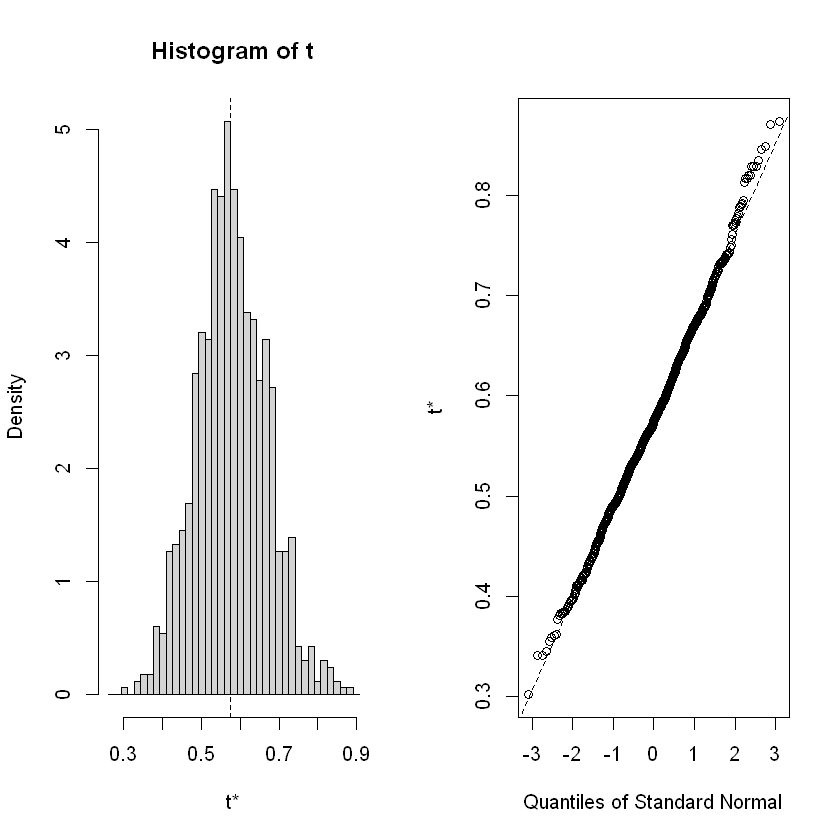

In [59]:
plot(example)

The final output shows that using the original data, $\hat{\alpha}=0.5758$,
and that the bootstrap estimate for ${\rm SE}(\hat{\alpha})$ is $0.0897$.

\subsubsection{Estimating the Accuracy of a Linear Regression Model}

The bootstrap approach can be used  to assess the
variability of the coefficient estimates and predictions from a statistical learning method. Here we use the bootstrap approach in order to assess the variability of
the estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression model
that uses  `horsepower` to predict `mpg` in the `Auto` data set. We will compare the estimates obtained using the bootstrap to those obtained using the formulas
for ${\rm SE}(\hat{\beta}_0)$ and ${\rm SE}(\hat{\beta}_1)$ described
in Section 3.1.2.

We first create a simple function, `boot.fn()`, which takes in the
`Auto` data set as well as a set of indices for the observations, and
returns the intercept and slope estimates for the linear regression model. We then apply this function
to the full set of $392$ observations in order to compute the estimates of $\beta_0$ and $\beta_1$ on the entire data set using the usual linear regression coefficient estimate
formulas from Chapter 3. Note that we do not need the `{` and `}` at the beginning and end of the function because it is only one line long.

In [68]:
boot.fn <- function(data, index)
  coef(lm(mpg ~ horsepower, data = data, subset = index))

In [69]:
lm(mpg ~ horsepower, data = Auto)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Coefficients:
(Intercept)   horsepower  
    39.9359      -0.1578  


In [70]:
boot.fn(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

 The `boot.fn()` function can also be used in order to create
 bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations with replacement. Here we give two examples.

In [72]:
set.seed(1)
boot.fn(Auto, sample(392, 392, replace = T))
boot.fn(Auto, sample(392, 392, replace = T))

(Intercept)  horsepower 
 40.3404517  -0.1634868

(Intercept)  horsepower 
 40.1186906  -0.1577063

Next, we use the `boot()` function to compute the standard errors of 1,000 bootstrap estimates for the intercept and slope terms.

In [73]:
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0544513229 0.841289790
t2* -0.1578447 -0.0006170901 0.007343073

This indicates that the bootstrap estimate for ${\rm SE}(\hat{\beta}_0)$ is $0.84$, and that the bootstrap estimate for ${\rm SE}(\hat{\beta}_1)$ is $0.0073$.
As discussed in Section 3.1.2, standard formulas can be used to compute the standard errors for the regression coefficients in a linear model. These can be obtained using the  `summary()` function.

In [74]:
summary(lm(mpg ~ horsepower, data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.9358610,0.717498656,55.65984,1.220362e-187
horsepower,-0.1578447,0.006445501,-24.48914,7.031989e-81


The standard error estimates for $\hat{\beta}_0$ and
$\hat{\beta}_1$ obtained using the formulas from
Section 3.1.2 are $0.717$ for the intercept and $0.0064$
for the slope. Interestingly, these are somewhat different from the
estimates obtained using the bootstrap.  Does this indicate a problem
with the bootstrap? In fact, it suggests the opposite.  Recall that
the standard formulas given in Equation 3.8 on page66 rely on certain assumptions. For example, they depend
on the unknown parameter $\sigma^2$, the noise variance. We then estimate $\sigma^2$
using the RSS. Now although the formulas for the standard errors do not rely on the linear model
being correct, the estimate for $\sigma^2$ does.
We see in
Figure 3.8 on page91 that there is a non-linear relationship in
the data, and so the residuals from a linear fit will be inflated, and so will $\hat{\sigma}^2$.
Secondly, the standard formulas assume (somewhat unrealistically) that the $x_i$ are fixed, and all the variability comes from the variation in the errors $\epsilon_i$.
 The bootstrap approach does not rely on any of these assumptions, and so it is
likely giving a more accurate estimate of the standard errors of
$\hat{\beta}_0$ and $\hat{\beta}_1$ than is the `summary()`
function.

Below we compute the bootstrap standard error estimates and the standard
linear regression estimates that result from fitting the quadratic model to the data. Since this model provides a good fit to the data (Figure 3.8), there is now a better correspondence between the bootstrap estimates and the standard estimates of ${\rm SE}(\hat{\beta}_0)$, ${\rm SE}(\hat{\beta}_1)$ and ${\rm SE}(\hat{\beta}_2)$.

In [75]:
boot.fn <- function(data, index)
  coef(
      lm(mpg ~ horsepower + I(horsepower^2), 
        data = data, subset = index)
    )

In [79]:
set.seed(1)
reg_lineal = boot(Auto, boot.fn, 100000)

In [82]:
boot(Auto, boot.fn, 100000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1e+05)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  4.500954e-02 2.0937092857
t2* -0.466189630 -8.593452e-04 0.0334036419
t3*  0.001230536  3.683089e-06 0.0001207652

In [80]:
summary(
    lm(mpg ~ horsepower + I(horsepower^2), data = Auto)
  )$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),56.900099702,1.8004268063,31.60367,1.740911e-109
horsepower,-0.466189630,0.0311246171,-14.97816,2.289429e-40
I(horsepower^2),0.001230536,0.0001220759,10.08009,2.196340e-21


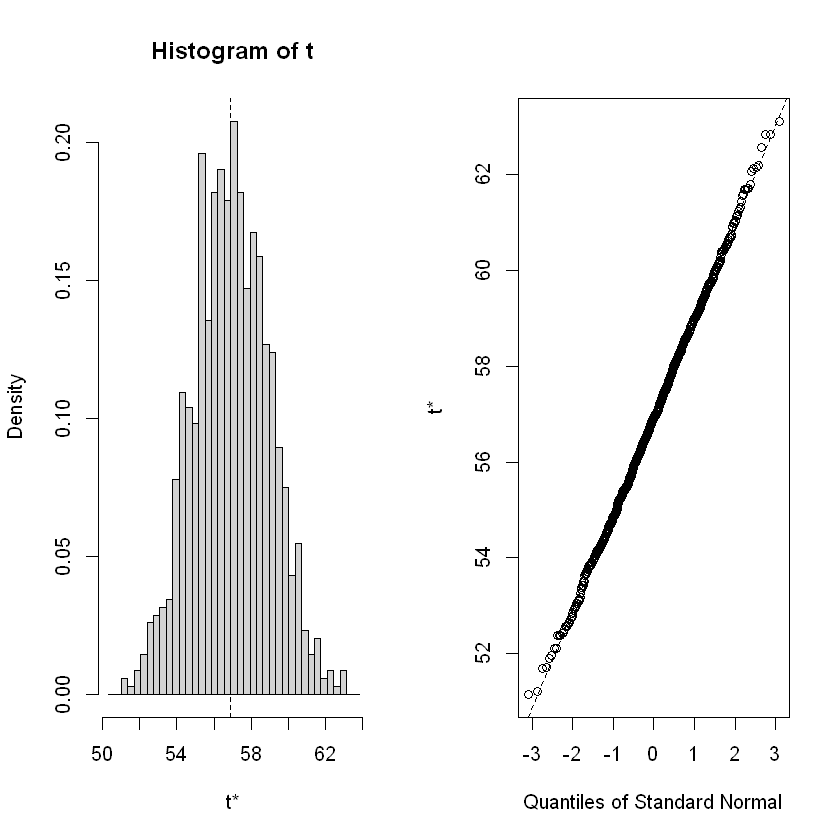

In [81]:
plot(reg_lineal)